# Electronic sales data

In [167]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

folder_path = 'data' 

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Create an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Iterate over the CSV files
for file in csv_files:
    file_path = os.path.join(folder_path, file)

    # Read the CSV file
    df = pd.read_csv(file_path)

    # Append the data to the combined DataFrame
    combined_data = combined_data.append(df, ignore_index=True)

# Save the combined data to a CSV file
combined_file_name = 'combined_data.csv'
combined_data.to_csv(combined_file_name, index=False)

print(f"Combined data saved to '{combined_file_name}'.") 

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/849882023.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/849882023.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/849882023.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(df, ignore_index=True)
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/849882023.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

Combined data saved to 'combined_data.csv'.


In [168]:
# Read CSV file
df= pd.read_csv('combined_data.csv')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [169]:
# get the data info
df.info()
# get the statical summary 
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [170]:
# add a new column, month
df['Month'] = df['Order Date'].str[0:2]
# add a new column, Year
df['Year'] = df['Order Date'].str[6:8]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,19
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,19
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,19
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,19
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,19
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,19
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06,19
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,19
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,19


In [171]:
# checking for Null values 
df.isnull().sum()
df[df.isna().any(axis=1)] #this display all the columns and rows that have NaN values 
# drop NaN values 
df.dropna(inplace=True)

In [172]:
# clean the data, find 'Or' and delete it 
df = df[df['Order Date'].str[0:2] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,19
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,19
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,19
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,19
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,19
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,19
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06,19
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,19
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,19


In [173]:
# convert quantity ordered to int
df['Quantity Ordered']= df['Quantity Ordered'].astype(int)
# convert Price Each to float
df['Price Each']= df['Price Each'].astype(float)
# convert Month to int
df['Month'] = df['Month'].astype(int)

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/1287187708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered']= df['Quantity Ordered'].astype(int)
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/1287187708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each']= df['Price Each'].astype(float)
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/1287187708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [174]:
#Add a sales column 
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/2710988687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,19,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,19,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,19,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,19,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,19,11.95


### What was the best month for sales? How much was earned that month?


In [175]:
# groupy by month
best_months = df.groupby('Month').sum() 
best_months 

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/2541173807.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_months = df.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


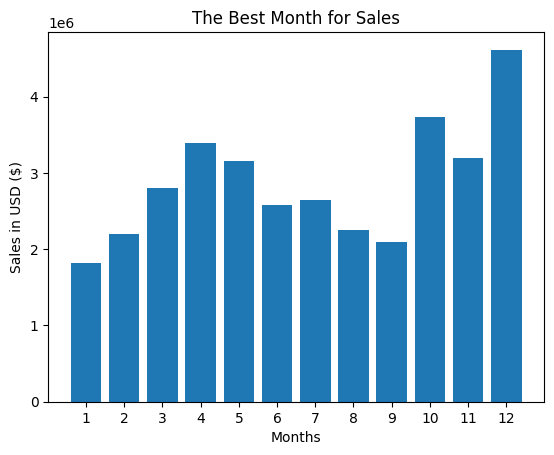

In [176]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
months = range(1,13)
plt.bar(months, best_months['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Months')
plt.title('The Best Month for Sales')
plt.savefig('image/Best_Month_for_Sales.jpg')
plt.show()


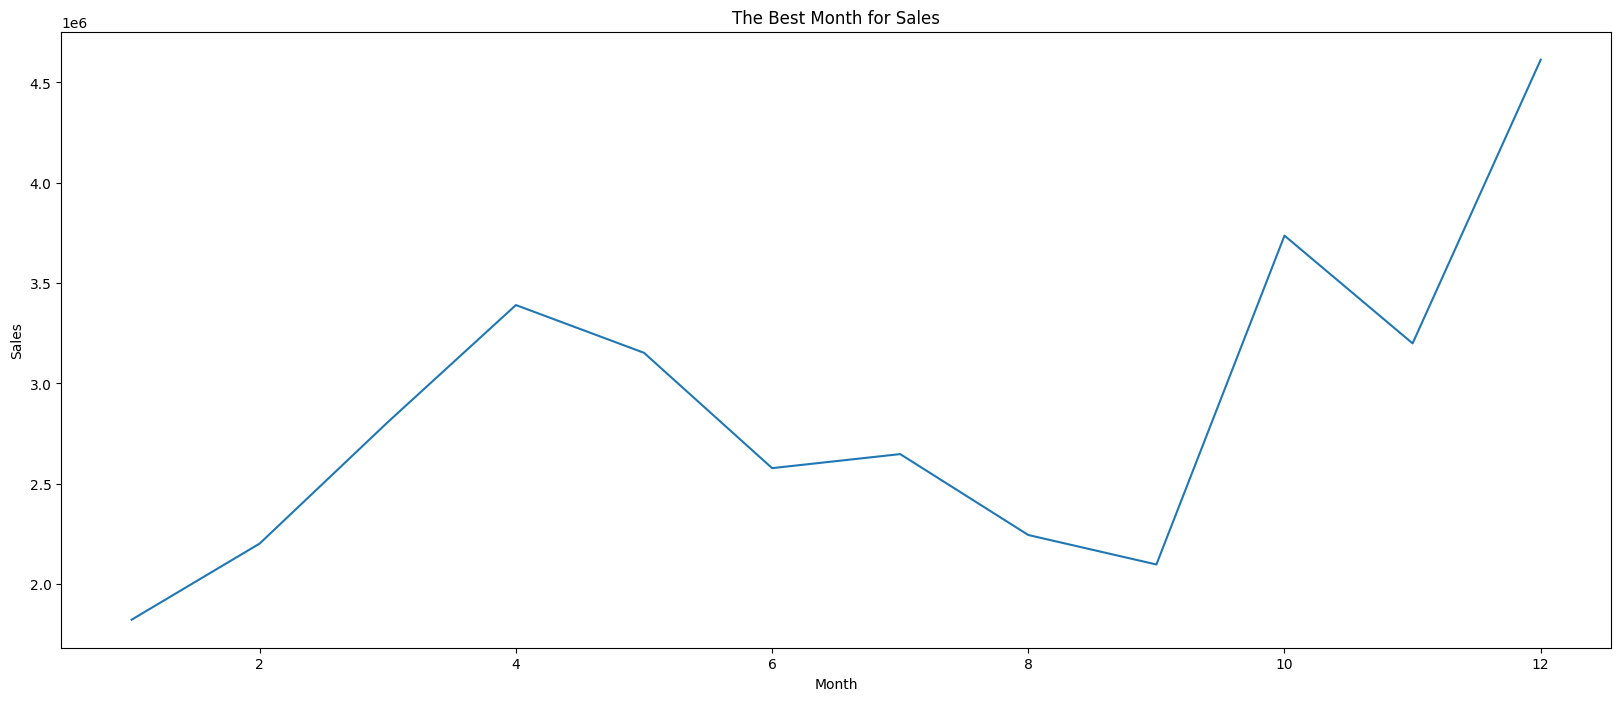

In [177]:
plt.figure(figsize=(20,8))
sns.lineplot(x='Month', y='Sales', data=best_months)
plt.title('The Best Month for Sales')
plt.savefig('image/2Best_Month_for_Sales.jpg')
plt.show()

##### The Month of December seems to be the best month for sale, and this could be due to the multiple holidays. Even October, November are also high because there are many holidays during those months.  

### Which cities have the highest number of sales ?

In [178]:
# create a new column called city and use the apply method and lambda to split to get the 1 and 2 index
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])
df.head()

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/1292857432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + ' ' + x.split(',')[2].split(' ')[1])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,19,1700.00,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,19,600.00,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,19,11.95,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,19,149.99,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,19,11.95,Atlanta GA


In [179]:
best_cities = df.groupby('City').sum()
best_cities

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/973006473.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_cities = df.groupby('City').sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


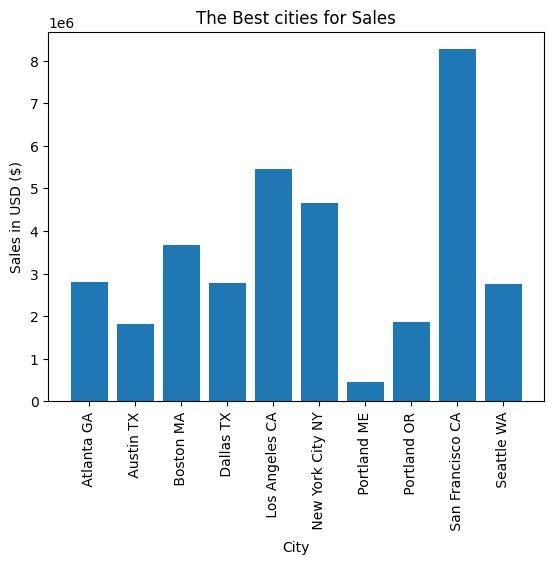

In [180]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
cities = [city for city, df in df.groupby('City')] 
plt.bar(cities, best_cities['Sales'])
plt.xticks(cities, rotation= 'vertical', size= 10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.title('The Best cities for Sales')
plt.savefig('image/Best_city_for_Sales.jpg')
plt.show()

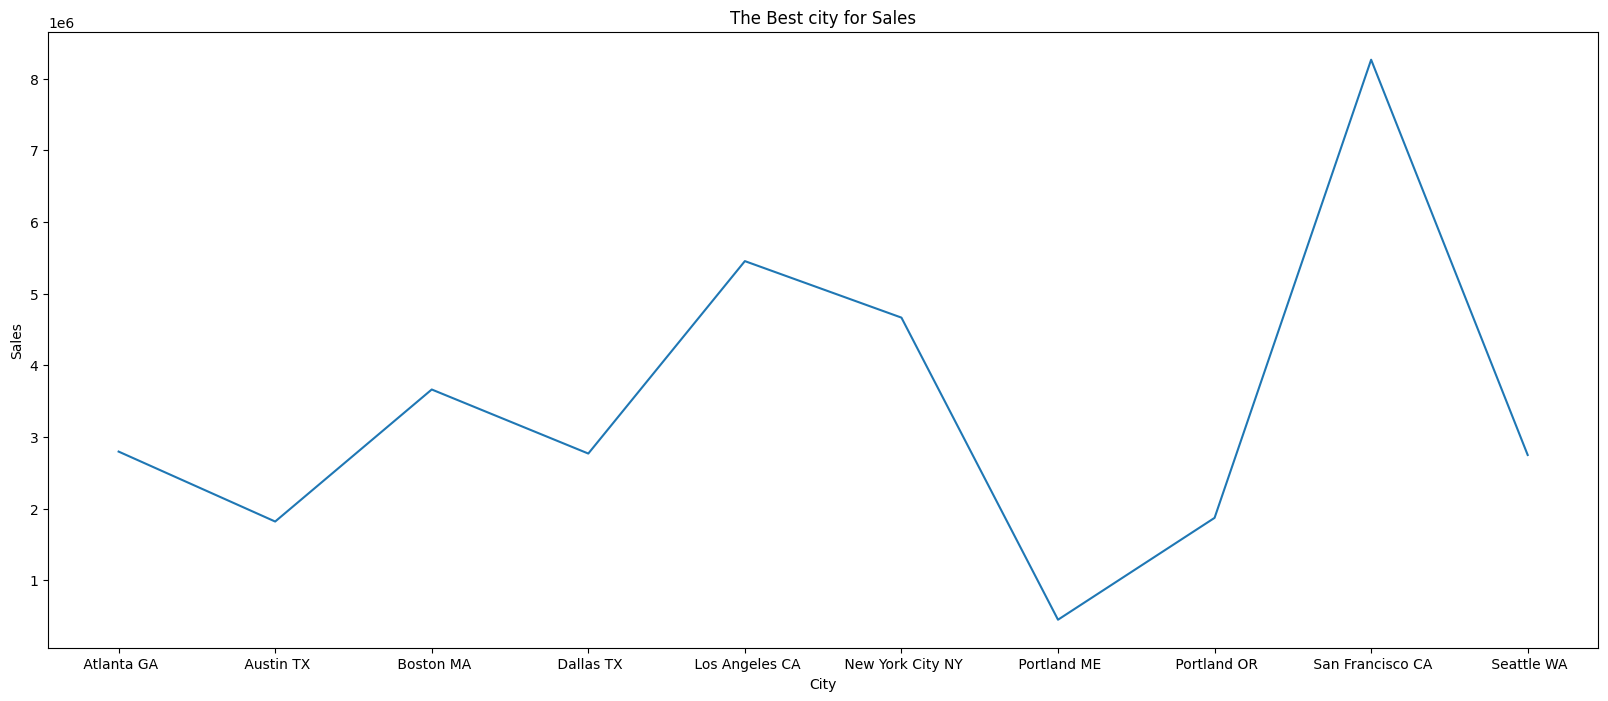

In [181]:
plt.figure(figsize=(20,8))
sns.lineplot(x='City', y='Sales', data=best_cities)
plt.title('The Best city for Sales')
plt.savefig('image/2Best_city_for_Sales.jpg')
plt.show()

#### The best city for sale is San Francisco CA, and looking at these charts, we can see that some of the big cities are best cities for sale. This could be due to the fact that California is the nation's largest manufacturing state. Also, electronics is California's largest industrial sector, and it is home to top companies such as Tesla. 


### What time should we display adverts to maximize purchases

In [182]:
# Using the day time method to convert the time 
df['Date_Time'] = pd.to_datetime(df['Order Date'])

# create hour and minutes columns 
df['Hour']= df['Date_Time'].dt.hour
df['Minute']= df['Date_Time'].dt.minute
df.head()

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/3092471871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_Time'] = pd.to_datetime(df['Order Date'])
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/3092471871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour']= df['Date_Time'].dt.hour
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/3092471871.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,Date_Time,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,19,1700.00,New York City NY,2019-12-30 00:01:00,0,1
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,19,600.00,New York City NY,2019-12-29 07:03:00,7,3
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,19,11.95,New York City NY,2019-12-12 18:21:00,18,21
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,19,149.99,San Francisco CA,2019-12-22 15:13:00,15,13
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,19,11.95,Atlanta GA,2019-12-18 12:38:00,12,38


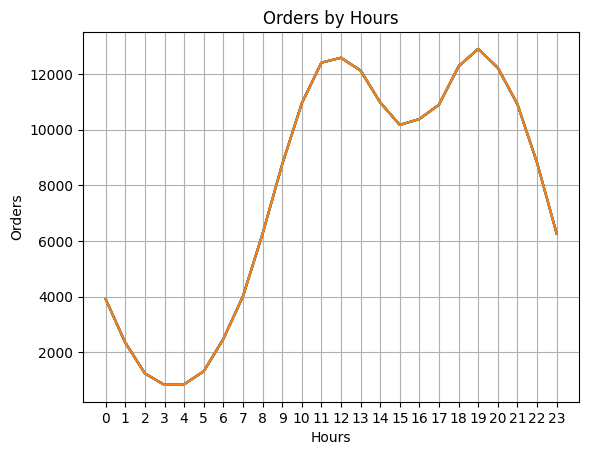

In [183]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
hours= [hour for hour, df in df.groupby('Hour')]
plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Orders')
plt.title('Orders by Hours')
plt.grid()
plt.savefig('image/order_by_hour.jpg')
plt.show()


#### So it is best recomended to display advertisements around 11am or 7pm 

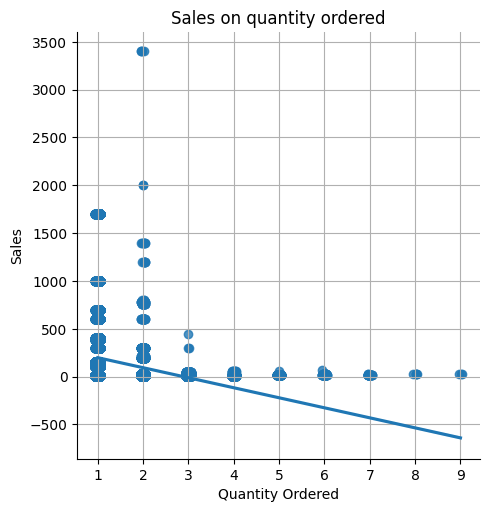

In [184]:
# Sales made base on quantity ordered 
sns.lmplot(y="Sales", x="Quantity Ordered", data=df, x_jitter=.05)
plt.title('Sales on quantity ordered')
plt.savefig('image/Sales_quantity_ordered.jpg')
plt.grid()
plt.show()

In [185]:
df.head()
df.to_csv('clean_data.csv', index= False)

### What product are often sold together 

In [186]:
# This data has product that have the same orderId and sold to the same address
# So find the duplicates https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
Products = df[df['Order ID'].duplicated(keep=False)]
# use the transform method to join values from two rows into a single row
Products['Grouped'] = Products.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# drop rows with duplicate values
Products= Products[['Order ID', 'Grouped']].drop_duplicates()
Products.head()


/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/161301791.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Products['Grouped'] = Products.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [187]:
from itertools import combinations
from collections import Counter
# I use this for reference https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
count = Counter()

for row in Products['Grouped']:
    row = row.split(',')
    count.update(Counter(combinations(row,3))) # can increment or decrement the number to see the item sold most in a row
for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


### What product sold the most and why ? 

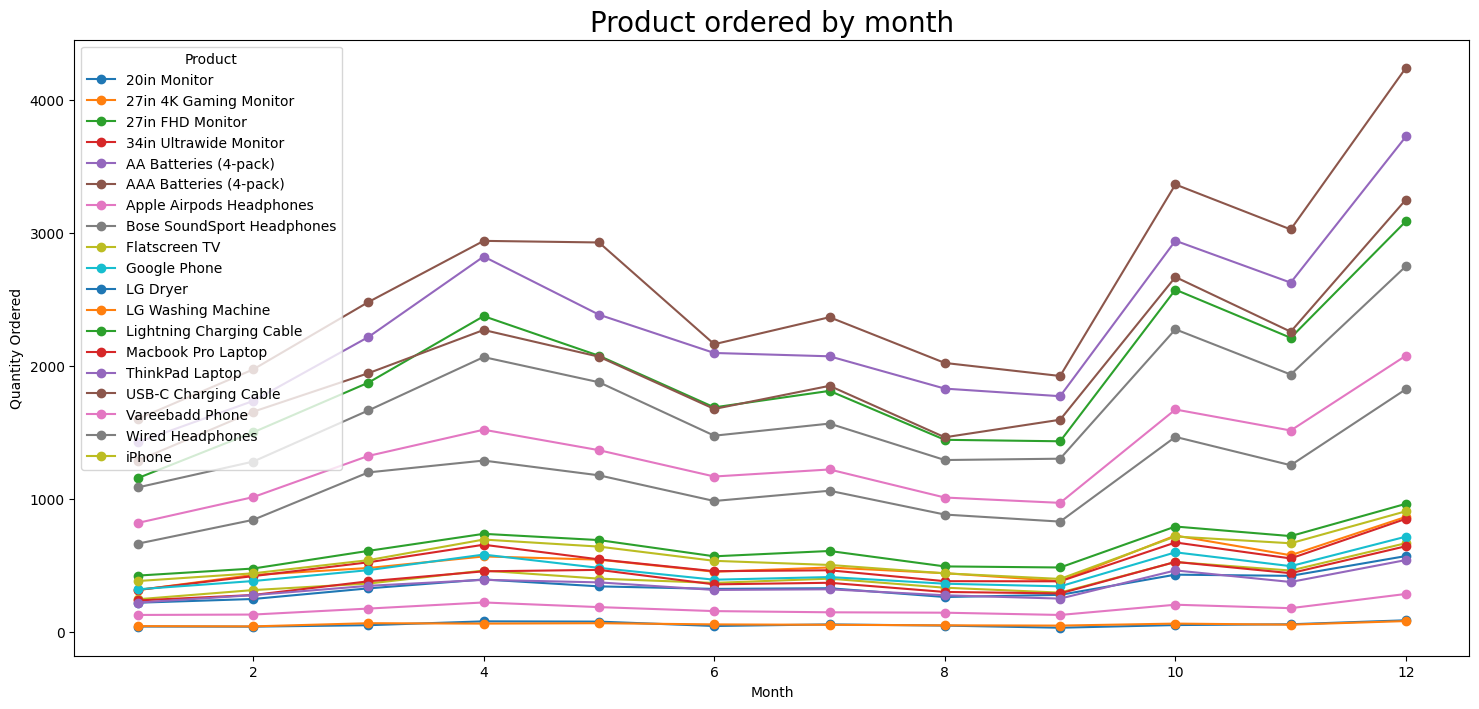

In [188]:
# product sold by month
data = df.groupby(['Month','Product'])['Quantity Ordered'].sum().unstack()
data.plot(figsize=(18,8), marker='o')
plt.ylabel('Quantity Ordered')
plt.title('Product ordered by month', fontsize = 20)
plt.savefig('image/Product_ordered_by month.jpg')


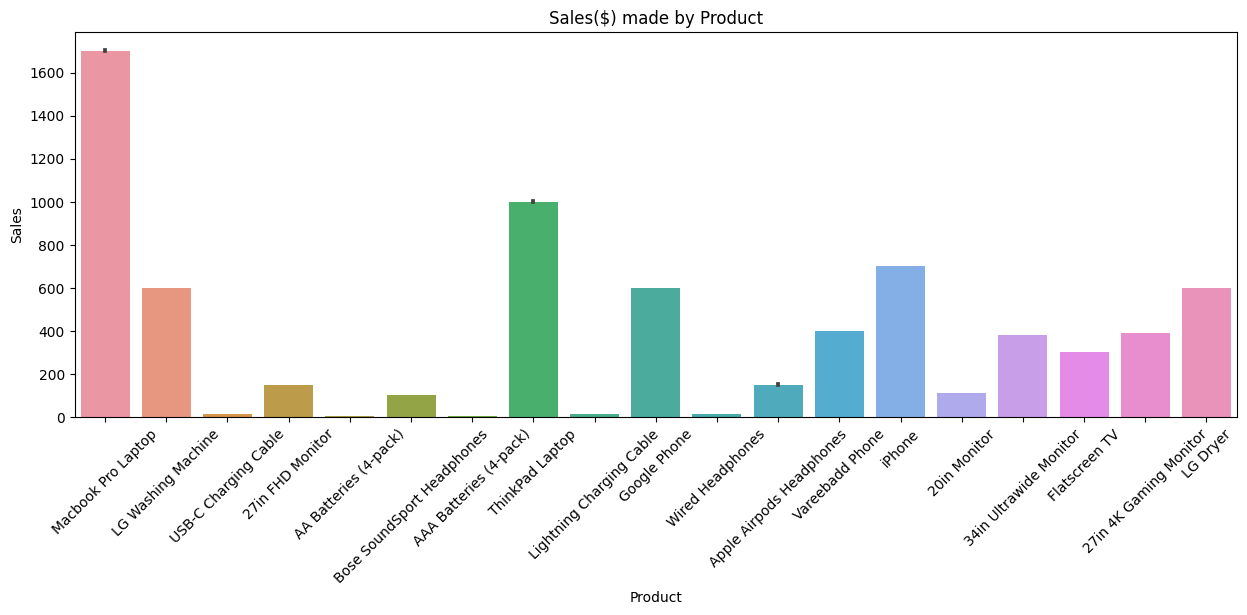

In [189]:
# Sales made by product
plt.figure(figsize=(15,5))
plt.tight_layout()
sns.barplot(x='Product',y='Sales',data=df)
plt.xticks(rotation=45)
plt.title('Sales($) made by Product')
plt.savefig('image/Sales_by_Product.jpg')
plt.show()

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/1624127361.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  product_sold = product_grp.sum()['Quantity Ordered']


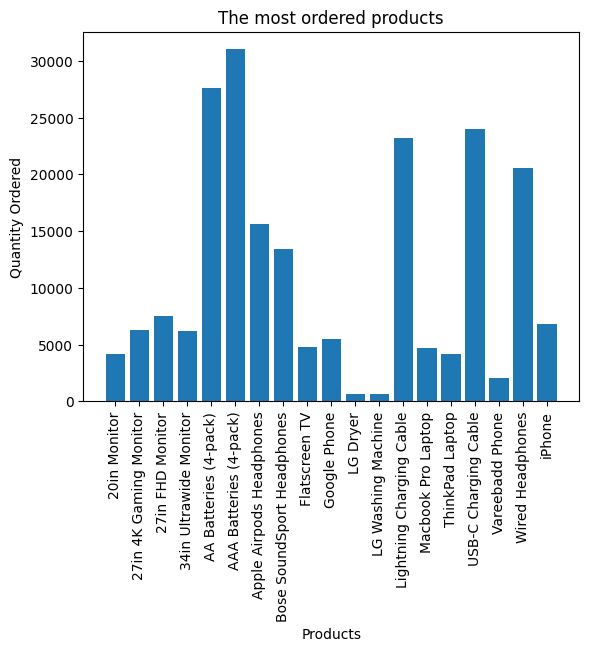

In [190]:
product_grp = df.groupby('Product')
product_sold = product_grp.sum()['Quantity Ordered']

prdcts = [product for product, Products in product_grp]

plt.bar(prdcts, product_sold)
plt.xticks(prdcts, rotation = 'vertical', size=10)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.title('The most ordered products')
plt.savefig('image/most_ordered_products.jpg')
plt.show() 


/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/672870934.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = df.groupby('Product').mean()['Price Each']
/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/672870934.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(prdcts, rotation = 'vertical', size=10)


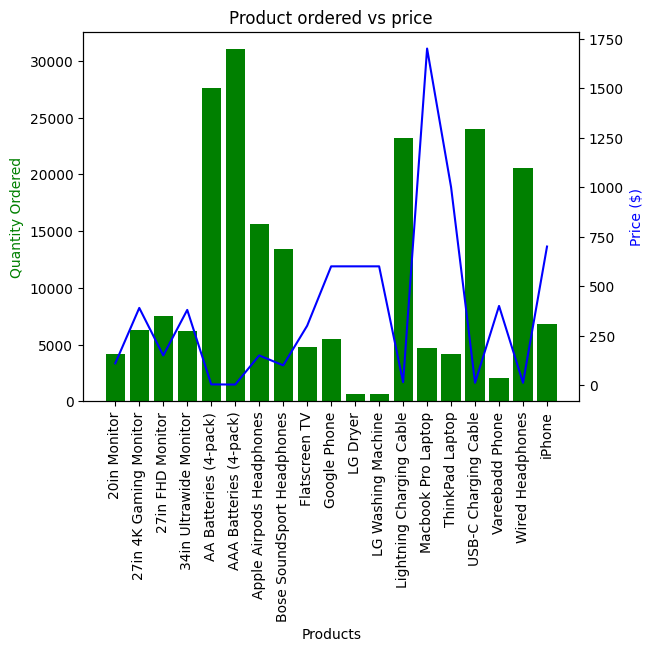

In [191]:
# to see why AAA Bateries are sold the most by looking at graph of quantity ordered versus price 
prices = df.groupby('Product').mean()['Price Each']
# adding a second y axis to the chart - https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(prdcts, product_sold, color='g')
ax2.plot(prdcts, prices, 'b-')

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(prdcts, rotation = 'vertical', size=10)
plt.title('Product ordered vs price')
plt.savefig('image/Product_ordered_price.jpg')
plt.show()

#### This shows the evidence of the quantity of AAA Batteries ordered are high, however there price is low because AAA batteries are cheaper

/var/folders/x7/crx4vr4x15bb27ylnzvk1p_r0000gn/T/ipykernel_52790/3397698146.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,)


<AxesSubplot: >

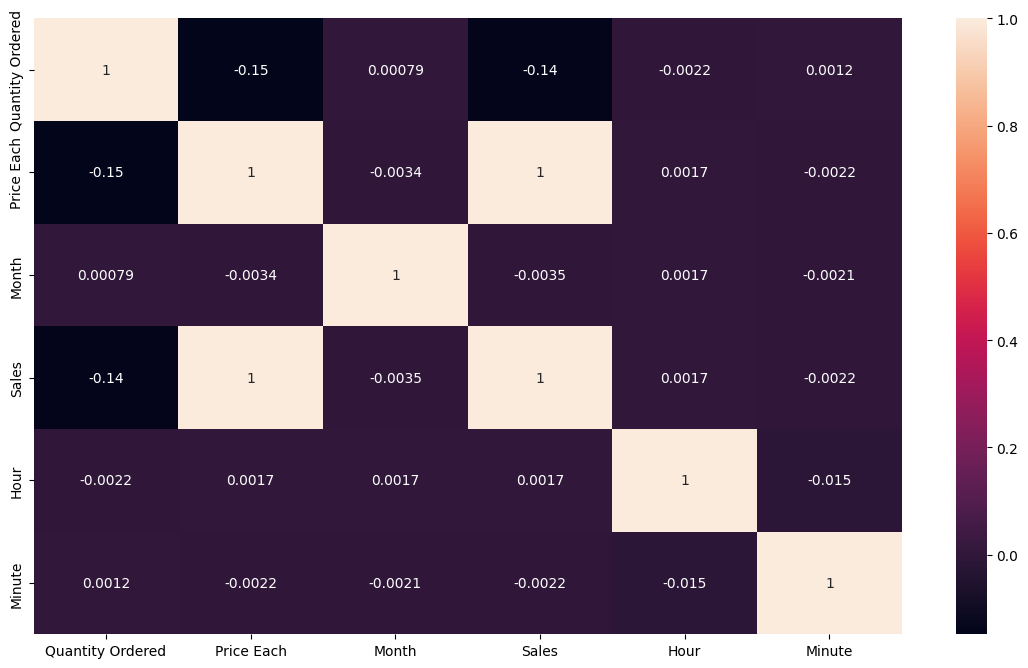

In [192]:
# Heat Map
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,)

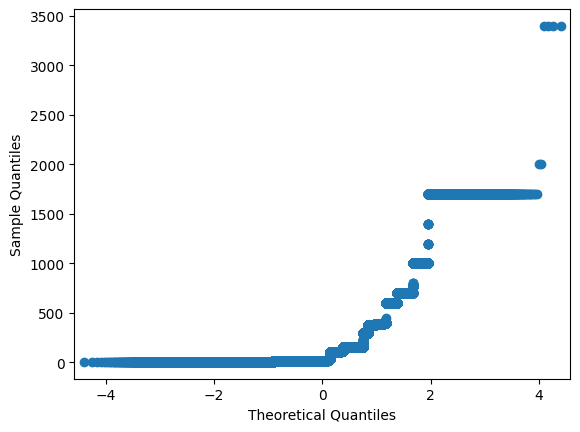

In [193]:
##QQ PLOT
import pandas as pd 
import statsmodels.api as sm 
import matplotlib as plt 
import numpy as np 
df = pd.read_csv('clean_data.csv')
fig=sm.qqplot(df["Sales"])

In [194]:
df.drop(['Order ID','Order Date','Purchase Address','Month','Date_Time',
         'Hour','Minute'],axis=1,inplace=True)

In [195]:
df.head()

,Product,Quantity Ordered,Price Each,Year,Sales,City
0,Macbook Pro Laptop,1,1700.00,19,1700.00,New York City NY
1,LG Washing Machine,1,600.00,19,600.00,New York City NY
2,USB-C Charging Cable,1,11.95,19,11.95,New York City NY
3,27in FHD Monitor,1,149.99,19,149.99,San Francisco CA
4,USB-C Charging Cable,1,11.95,19,11.95,Atlanta GA


Training Score : 0.9984049719601884
Test Score     : 0.998693778937689


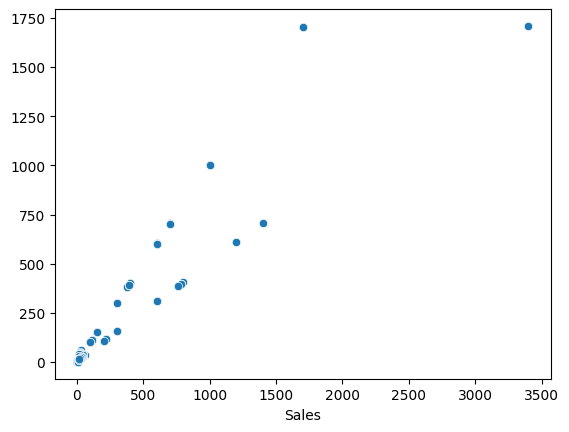

In [196]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Product'] = le.fit_transform(df['Product'])
df['City'] = le.fit_transform(df['City'])

df = pd.get_dummies(data=df,columns=['Product', 'City'])

X = df.drop('Sales',axis=1)

y=df['Sales']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train,y_train)

y_pred = lm.predict(X_test)

sns.scatterplot(x=y_test,y=y_pred)
print('Training Score :',lm.score(X_train, y_train))
print('Test Score     :',lm.score(X_test, y_test))

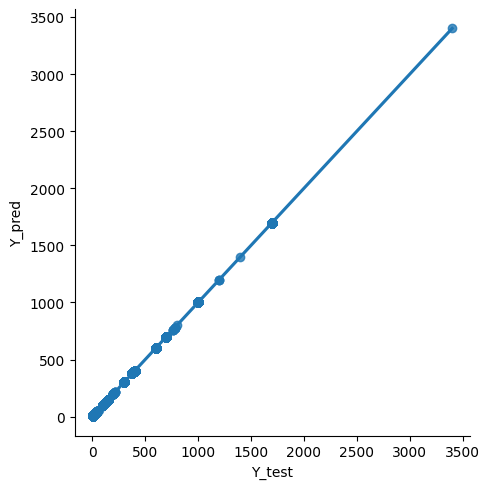

In [197]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

pred_df = pd.DataFrame({'Y_test':y_test,'Y_pred':y_pred}).reset_index()

pred_df.drop('index',axis=1,inplace=True)

#plt.figure(figsize=(13,8))
sns.lmplot(x='Y_test',y='Y_pred',data=pred_df)

<AxesSubplot: >

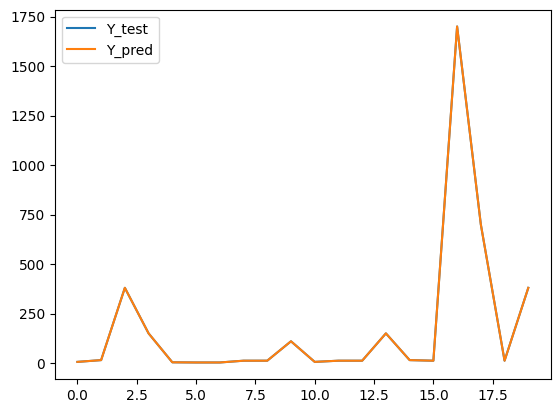

In [198]:
pred_df[:20].plot(kind='line')

In [199]:
print('Training Score :',model.score(X_train, y_train))
print('Test Score     :',model.score(X_test, y_test))

Training Score : 1.0
Test Score     : 1.0
